In [53]:

import csv
import pandas as pd
import numpy as np
import os
import git
from pydriller import GitRepository
from pydriller import RepositoryMining

In [79]:
PATH_PROJECT = '/home/matheus/Documentos/Mestrado/teste/poc-test-user-github'

PATH_PROJECT_DOIS = 'https://github.com/sous-chefs/java.git'

In [80]:
data_commits = []

for commit in RepositoryMining(PATH_PROJECT_DOIS).traverse_commits():
    for m in commit.modifications:
        # print(
        #     '{} | {} | {} | {} | {} | {} | {} | {}'.format(
        #         commit.committer_date,
        #         commit.hash,
        #         commit.author.name,
        #         m.new_path,
        #         m.filename,
        #         m.change_type.name,
        #         m.added,
        #         m.removed
        #     )
        # )
        data_commits.append({'date': commit.committer_date, 'hash': commit.hash, 'author' : commit.author.name, 'email' : commit.author.email, 'path' : m.new_path, 'file': m.filename, 'change_type': m.change_type.name, 'added': m.added, 'removed': m.removed})


dfcommits = pd.DataFrame(data_commits)


In [81]:
dfcommits['test'] = dfcommits.path.str.contains(r'/test/|/tests/',regex=True)

In [82]:
dfcommits.head()

,date,hash,author,email,path,file,change_type,added,removed,test
0,2009-01-17 16:45:51-08:00,630e636faae7dda73e7e0b9d720630a4891724b7,Adam Jacob,adam@hjksolutions.com,files/default/java.seed,java.seed,ADD,11,0,False
1,2009-01-17 16:45:51-08:00,630e636faae7dda73e7e0b9d720630a4891724b7,Adam Jacob,adam@hjksolutions.com,recipes/default.rb,default.rb,ADD,47,0,False
2,2009-01-17 17:16:54-08:00,402a1c43cc0447abc7898b164d985b924c5cf1da,Adam Jacob,adam@hjksolutions.com,recipes/default.rb,default.rb,MODIFY,2,2,False
3,2009-01-17 17:19:15-08:00,e05be1bd335b43f35c5a9345947cba26428abeb1,Adam Jacob,adam@hjksolutions.com,recipes/default.rb,default.rb,MODIFY,1,1,False
4,2009-06-02 21:03:26-06:00,9c2182d23f5ffbc5a98a08dbe1cacef35ba39142,jtimberman,joshua@opscode.com,metadata.rb,metadata.rb,ADD,6,0,False


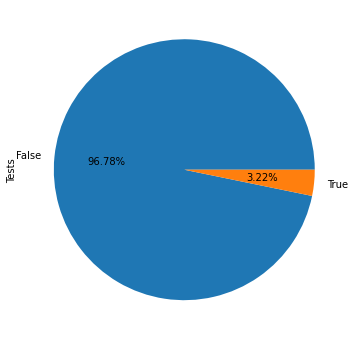

In [83]:
tests = dfcommits['test'].value_counts()
tests.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Tests")

In [91]:
commits = dfcommits['hash'].value_counts()

# commits.plot(kind='bar', figsize=(20,6))
commits.head()

b0a87646150b6f395b5909b354b9a4ec92374084    75
350e62019bc08f4a77df18f8b68cea88fda049e1    51
fbe5a566ff5cfc9633646be9ac902092cbb1feec    37
10dd375fd03e4bb6682669245f39af284d33545a    31
193d3f74224cdc69cae7b3df4b66074ebeff546a    28
Name: hash, dtype: int64

In [ ]:
dfcommits['hash'].value_counts()dfcommits['hash'].value_counts()

In [86]:
total_contributions_author_test = dfcommits[dfcommits['test'] == 1]['author'].value_counts()
total_contributions_author_test

Dan Webb              29
Jim Morris            14
Stephane Jeandeaux     8
jtimberman             3
Bryan Berry            2
Duncan Schulze         2
emillbrandt            1
Corey Hemminger        1
Joshua Colson          1
Tim Smith              1
Seth Vargo             1
Christophe Arguel      1
Ben Abrams             1
Name: author, dtype: int64

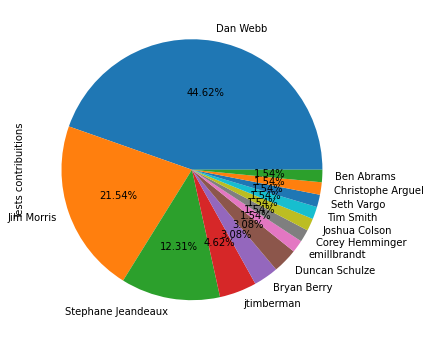

In [87]:
total_contributions_author_test.plot(kind='pie', autopct="%0.2f%%",figsize=(6,6),label="Tests contribuitions")